In [37]:
import numpy as np
import galpro as gp
from astropy.table import Table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump
from joblib import load
import numba
from numba import njit, prange
sns.set()
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 0.8)
sns.set_style("ticks")

In [3]:
# Lectura de datos
sdss_f = Table.read('/usr/local/datos/Data/firefly.fits')
sdss_f = sdss_f.to_pandas()
print(sdss_f.columns)
sdss_f.describe()

Index(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
       'modelMagErr_i', 'modelMagErr_z', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag'],
      dtype='object')


,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,...,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06
mean,1.237664e+18,2.190825e+01,2.019960e+01,1.900446e+01,1.828134e+01,1.783241e+01,4.860968e-01,3.034060e-02,4.778364e-02,4.400825e-03,...,4.012871e+09,8.645808e+11,1.601401e+12,5.619350e+11,3.622103e-01,3.451672e-04,1.474408e+01,1.476648e+01,2.772285e+01,5.320650e+02
std,8.071345e+12,3.068943e+01,2.976252e+01,1.951369e+00,1.667261e+01,2.574329e+01,3.053414e+01,2.961587e+01,9.505250e-02,1.655559e+01,...,2.883227e+09,1.990488e+14,3.076646e+14,1.402744e+14,2.643933e-01,1.232947e-02,1.811691e+01,4.675645e+01,5.249987e+02,2.276397e+03
min,1.237646e+18,-9.999000e+03,-9.999000e+03,1.093223e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.460256e-03,-9.999000e+03,...,3.150416e+07,6.569957e+00,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.988576e+01,1.824849e+01,1.739374e+01,1.696370e+01,1.665336e+01,7.206018e-02,9.186987e-03,6.719161e-03,6.715965e-03,...,1.730767e+09,1.913292e+10,3.414572e+10,1.117989e+10,1.169350e-01,2.158676e-05,1.404600e+01,1.385200e+01,2.100000e-02,5.200000e-02
50%,1.237663e+18,2.222300e+01,2.061859e+01,1.898842e+01,1.835936e+01,1.797100e+01,3.989745e-01,4.632830e-02,1.808464e-02,1.604225e-02,...,3.629944e+09,5.513953e+10,8.476884e+10,3.404705e+10,3.345541e-01,6.376094e-05,1.472700e+01,1.457500e+01,3.800000e-02,1.010000e-01
75%,1.237668e+18,2.381873e+01,2.222643e+01,2.066218e+01,1.967993e+01,1.921976e+01,9.319945e-01,1.517605e-01,6.110542e-02,3.880709e-02,...,5.978926e+09,1.194992e+11,1.651541e+11,7.568667e+10,5.570847e-01,1.487330e-04,1.539800e+01,1.528100e+01,7.000000e-02,1.990000e-01
max,1.237681e+18,3.345042e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.955640e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.761312e+17,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [4]:
print('Cantidad de datos', len(sdss_f))
# Busqueda de duplicados
print('Busqueda de duplicados')
flag = np.sum(sdss_f['objid'].duplicated())
if flag > 0:
    print('Hay duplicados: ', flag)
    sdss_f = sdss_f.drop_duplicates(subset=['objid'])
    print('Eliminando duplicados')
    print('Cantidad de datos', len(sdss_f))
else:
    print('No hay duplicados')
# Valores negativos en cada columna
print('Valores negativos en cada columna')
np.sum(sdss_f < 0, axis=0)
# Eliminando valores negativos
print('Eliminando valores negativos')
morfologia = False
sdss_f = sdss_f[sdss_f['modelmag_u'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_g'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_i'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_z'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_u'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_g'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_i'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_z'] > 0]
if morfologia:
    sdss_f = sdss_f[sdss_f['petroR50_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_r'] > 0]
print('Cantidad de datos', len(sdss_f))
# Valores nan en cada columna
print('Valores nan en cada columna')
np.sum(sdss_f.isnull(), axis=0)
# Eliminando valores nan
#mpa = mpa.dropna()
#len(mpa)
# Valores con códigos de error
print('Valores con códigos de error')
np.sum(sdss_f[['w1mag','w2mag','w1sigmag','w2sigmag']] >= 9999, axis=0)
# Eliminando valores con códigos de error
print('Eliminando valores con códigos de error')
sdss_f = sdss_f[sdss_f['w1mag'] < 9999]
sdss_f = sdss_f[sdss_f['w2mag'] < 9999]
sdss_f = sdss_f[sdss_f['w1sigmag'] < 9999]
sdss_f = sdss_f[sdss_f['w2sigmag'] < 9999]
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f.reset_index(drop=True)
# Se agregan datos derivados
sdss_f['Chabrier_MILES_total_mass'] = np.log10(sdss_f['Chabrier_MILES_total_mass'])
sdss_f['u-g'] = sdss_f['modelmag_u'] - sdss_f['modelmag_g']
sdss_f['g-r'] = sdss_f['modelmag_g'] - sdss_f['modelmag_r']
sdss_f['r-i'] = sdss_f['modelmag_r'] - sdss_f['modelmag_i']
sdss_f['i-z'] = sdss_f['modelmag_i'] - sdss_f['modelmag_z']
sdss_f['r-w1'] = sdss_f['modelmag_r'] - sdss_f['w1mag']
sdss_f['u-g_err'] = np.sqrt(sdss_f['modelMagErr_u']**2 + sdss_f['modelMagErr_g']**2)
sdss_f['g-r_err'] = np.sqrt(sdss_f['modelMagErr_g']**2 + sdss_f['modelMagErr_r']**2)
sdss_f['r-i_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['modelMagErr_i']**2)
sdss_f['i-z_err'] = np.sqrt(sdss_f['modelMagErr_i']**2 + sdss_f['modelMagErr_z']**2)
sdss_f['r-w1_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['w1sigmag']**2)
if morfologia:
    sdss_f['cr'] = sdss_f['petroR50_r'] / sdss_f['petroR90_r']
    sdss_f['cg'] = sdss_f['petroR50_g'] / sdss_f['petroR90_g']
sdss_f = sdss_f.drop(['objid'], axis=1)

Cantidad de datos 1823940
Busqueda de duplicados
Hay duplicados:  19526
Eliminando duplicados
Cantidad de datos 1804414
Valores negativos en cada columna
Eliminando valores negativos
Cantidad de datos 1804393
Valores nan en cada columna
Valores con códigos de error
Eliminando valores con códigos de error
Cantidad de datos 1706024


14.4756823
23.33556941999998
0.07992207000000126
2.9170277000000007
0.0060699970300000005
1.070970425
8.101419200428408
12.012535759758583


<AxesSubplot:xlabel='Chabrier_MILES_total_mass', ylabel='Count'>

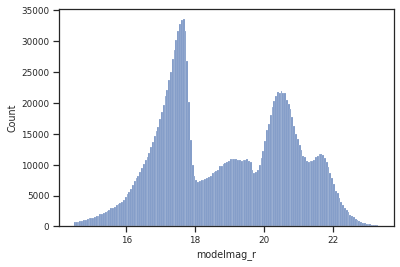

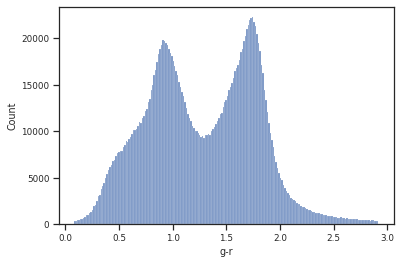

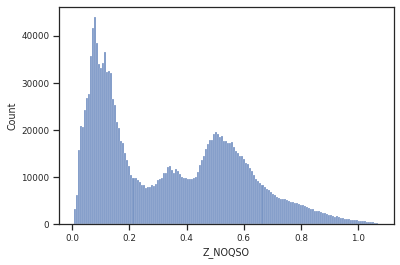

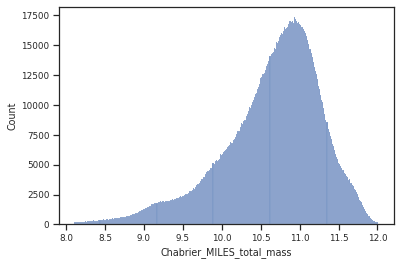

In [53]:
# Distribuciones principales
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.005)
print(liminf_r)
print(limsup_r)
sns.histplot(sdss_f['modelmag_r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['g-r']),q=0.99)
liminf_r = np.quantile(np.array(sdss_f['g-r']),q=0.003)
print(liminf_r)
print(limsup_r)
sns.histplot(sdss_f['g-r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.995)
liminf_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.001)
print(liminf_r)
print(limsup_r)
sns.histplot(sdss_f['Z_NOQSO'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.005)
print(liminf_r)
print(limsup_r)
sns.histplot(sdss_f['Chabrier_MILES_total_mass'],binrange=[liminf_r,limsup_r])

In [5]:
# Corte en los datos según las distribuciones anteriores
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f[sdss_f['modelmag_r'] > 14.4756823]
sdss_f = sdss_f[sdss_f['modelmag_r'] < 23.33556941999998]
sdss_f = sdss_f[sdss_f['g-r'] > 0.07992207000000126]
sdss_f = sdss_f[sdss_f['g-r'] < 2.9170277000000007]
sdss_f = sdss_f[sdss_f['Z_NOQSO'] > 0.0060699970300000005]
sdss_f = sdss_f[sdss_f['Z_NOQSO'] < 1.070970425]
sdss_f = sdss_f[sdss_f['Chabrier_MILES_total_mass'] > 8.101419200428408]
sdss_f = sdss_f[sdss_f['Chabrier_MILES_total_mass'] < 12.012535759758583]
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f.reset_index(drop=True)

Cantidad de datos 1706024
Cantidad de datos 1658364


<Figure size 432x288 with 0 Axes>

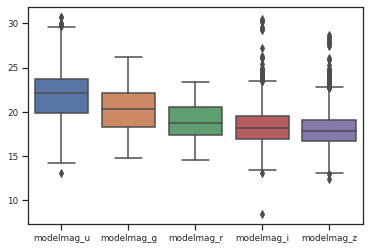

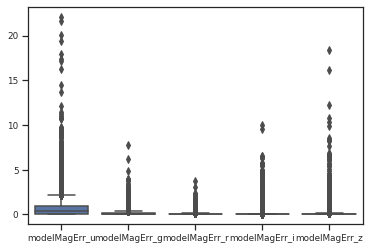

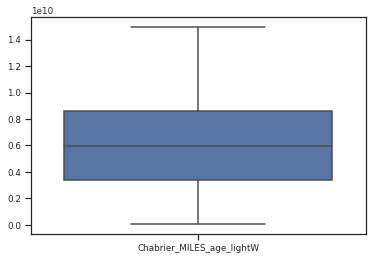

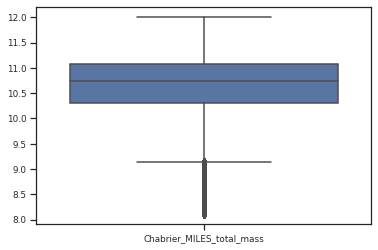

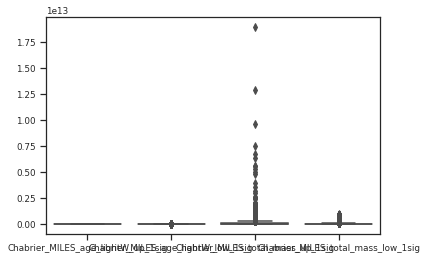

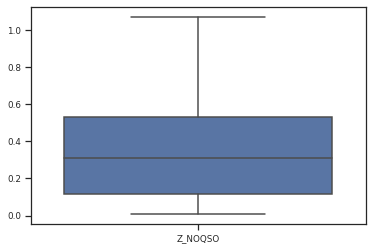

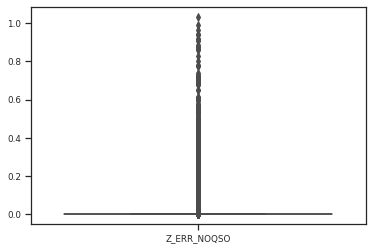

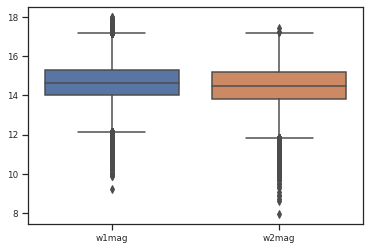

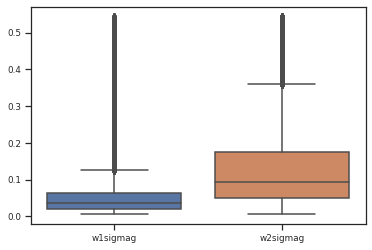

<Figure size 432x288 with 0 Axes>

In [57]:
# Visualización de outliers
plt.figure()
sns.boxplot(data=sdss_f[['modelmag_u','modelmag_g','modelmag_r','modelmag_i','modelmag_z']])
plt.figure()
sns.boxplot(data=sdss_f[['modelMagErr_u',
        'modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW']])
plt.figure()1658364
sns.boxplot(data=sdss_f[['Chabrier_MILES_total_mass']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW_up_1sig',
        'Chabrier_MILES_age_lightW_low_1sig',
        'Chabrier_MILES_total_mass_up_1sig',
        'Chabrier_MILES_total_mass_low_1sig']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_ERR_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['w1mag','w2mag']])
plt.figure()
sns.boxplot(data=sdss_f[['w1sigmag','w2sigmag']])
plt.figure()

In [399]:
#sdss_f = Table.from_pandas(sdss_f)
#sdss_f.write('sdss_firefly.fits', overwrite='True')

In [65]:
sdss_f.columns

Index(['level_0', 'index', 'objid', 'modelmag_u', 'modelmag_g', 'modelmag_r',
       'modelmag_i', 'modelmag_z', 'modelMagErr_u', 'modelMagErr_g',
       'modelMagErr_r', 'modelMagErr_i', 'modelMagErr_z',
       'Chabrier_MILES_age_lightW', 'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r', 'r-i', 'i-z', 'r-w1',
       'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err', 'r-w1_err'],
      dtype='object')

### Análisis PCA 

Index(['modelmag_r', 'modelmag_z', 'w2sigmag', 'g-r_err', 'modelmag_g',
       'modelmag_u', 'w2mag', 'u-g_err', 'r-i_err', 'modelMagErr_u',
       'modelMagErr_g', 'w1sigmag', 'g-r'],
      dtype='object')

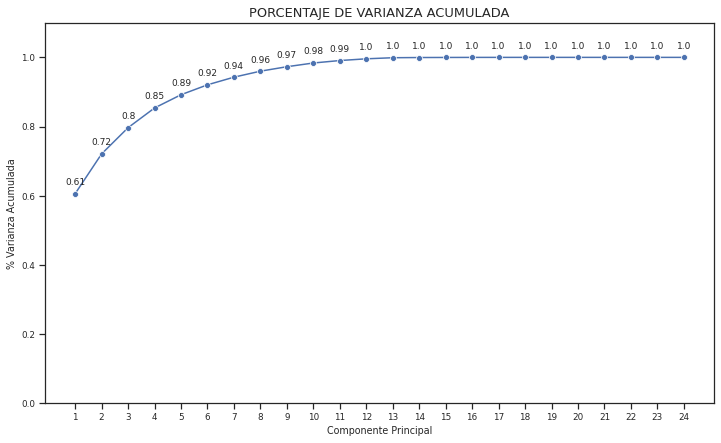

In [71]:
pca_sample = sdss_f.drop(['Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)
ss = StandardScaler()
datanorm = ss.fit_transform(pca_sample)
pca_sample.columns
pca = PCA()
pca.fit(datanorm)
comp = pca.transform(datanorm)
mean = pca.mean_
components = pca.components_
var = pca.explained_variance_ratio_
var = np.cumsum(var)
# Gráfico de las componentes principales
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(var)) + 1, y=var, marker='o', data=pca, 
                  legend='brief')

for x, y in zip(np.arange(len(var))+1, var):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), 
                ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada')

componentes = pd.DataFrame(abs(pca.components_),columns=pca_sample.columns)
comp2 = pd.DataFrame(componentes.max(),columns=['max']).sort_values(by=['max'],ascending=False)
comp2['indice'] = np.arange(len(comp2))
comp3 = comp2[(comp2.indice <= 12)]
comp3.index

# Entrenamiento

In [6]:
mod = 0
if mod == 0:
    ind_var = sdss_f.drop(['Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)
elif mod == 1:
    ind_var = sdss_f.drop(['Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)
    ind_var = ind_var[['i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 'u-g',
           'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err']]
elif mod == 2:
    ind_var = sdss_f.drop(['Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)
    ind_var = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','petroR50Err_g',
       'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r', 'u-g', 'g-r', 'r-i',
       'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err', 'r-w1_err',
       'cr', 'cg']]
elif mod == 3:
    ind_var = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig', 'Z_ERR_NOQSO'], axis=1)
    ind_var = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z','Z_NOQSO']]
    ind_var_err = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO'], axis=1)
    ind_var_err = ind_var_err[['modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z','Z_ERR_NOQSO']]

In [7]:
mod = 1
if mod == 0:
    dep_var = sdss_f.drop(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
           'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
           'modelMagErr_i', 'modelMagErr_z',
           'Chabrier_MILES_age_lightW_low_1sig',
           'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
           'w2mag', 'w1sigmag', 'w2sigmag',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
           'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err'
                          ,'petroR50_g','petroR50_r','petroR90_g','petroR90_r','petroR50Err_g',
                          'petroR50Err_r','petroR90Err_g','petroR90Err_r','cr','cg',
                           'Chabrier_MILES_age_lightW'], axis=1)
elif mod == 1:
    dep_var = sdss_f.drop(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
           'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
           'modelMagErr_i', 'modelMagErr_z',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
           'w2mag', 'w1sigmag', 'w2sigmag',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
           'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err'], axis=1)

In [10]:
print('Cantidad de targets = ', len(dep_var.columns))
print(dep_var.columns)

Cantidad de targets =  2
Index(['Chabrier_MILES_total_mass', 'Z_NOQSO'], dtype='object')


In [11]:
print('Cantidad de features = ', len(ind_var.columns))
print(ind_var.columns)

Cantidad de features =  24
Index(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
       'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
       'r-w1_err'],
      dtype='object')


In [125]:
modelo = RandomForestRegressor()
modelo.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
ind_vars_train, ind_vars_test, dep_vars_train, dep_vars_test = train_test_split(ind_var, 
                                                                                dep_var,
                                                                                random_state=3210,
                                                                                shuffle=True)

In [146]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = list(range(600, 900,50))
max_depth = list(range(10, 20))
min_samples_split = list(range(2, 12))
min_samples_leaf = list(range(1,8))
param_dist = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, 
                  min_samples_leaf=min_samples_leaf)
rand = RandomizedSearchCV(modelo, param_dist, cv=10, scoring='accuracy', n_iter=10, 
                          random_state=3210, refit=True)

In [148]:
%%time
rand.fit(ind_var, dep_var)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/clopez

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/clopez

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/clopez

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/clopez

KeyboardInterrupt: 

In [80]:
%%time
model_fit = modelo.fit(ind_vars_train, dep_vars_train)
dump(model_fit, 'mass_SDSS.joblib')

CPU times: user 59min 25s, sys: 760 ms, total: 59min 26s
Wall time: 59min 26s


# Feature importance

Text(0.5, 0, 'Random Forest Feature Importance')

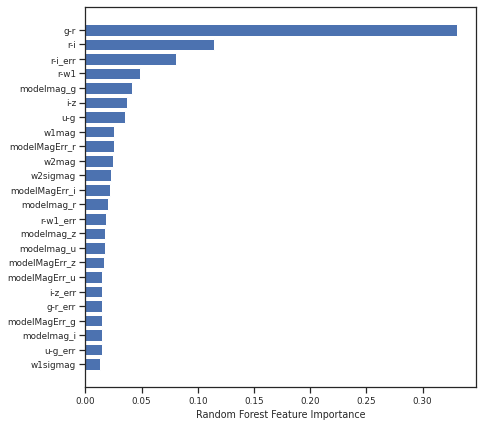

In [95]:
sorted_idx = model_fit.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(ind_var.columns[sorted_idx], model_fit.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Testeo del modelo

In [13]:
%%time
model_fit = load('regression.joblib')

CPU times: user 14.7 s, sys: 10.4 s, total: 25.1 s
Wall time: 54.4 s


In [16]:
%%time
model_pred = model_fit.predict(ind_vars_test)

CPU times: user 25.1 s, sys: 1.63 ms, total: 25.2 s
Wall time: 25.1 s


rms =  0.44700633685069674


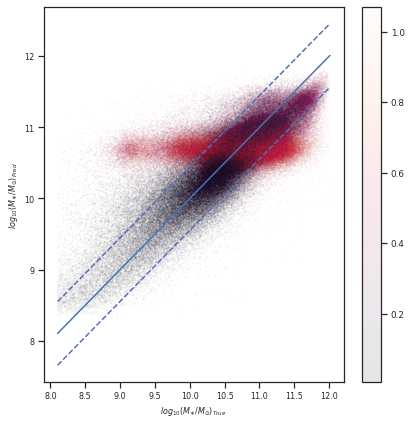

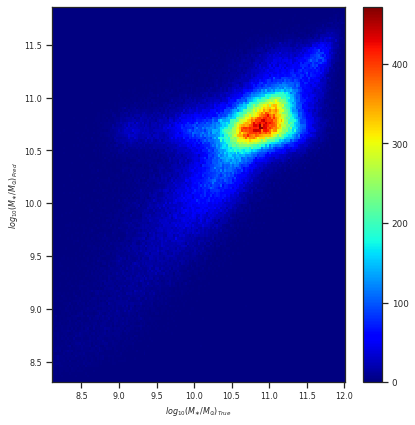

In [41]:
# Cortar los datos en un cuadro 2d
x = dep_vars_test['Chabrier_MILES_total_mass']
y = model_pred[:,0]
z = dep_vars_test['Z_NOQSO']
#mascara = (x < 12) & (x > 9) & (y < 12) & (y > 9)
#x = x[mascara]
#y = y[mascara]
#z = z[mascara]

ztest = dep_vars_test['Chabrier_MILES_total_mass']
zpred = model_pred[:,0]
#rms = np.sqrt(np.mean((ztest - zpred) ** 2))
rms = mean_squared_error(ztest, zpred, squared=False) # Usando la raíz cuadrada
print('rms = ', rms)

import matplotlib.colors as mcolors
gamma = 0.5

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.1, marker='.', s=0.2, c=z)
plt.colorbar()
plt.plot([x.min(),x.max()], [x.min(),x.max()], color='b')
plt.plot([x.min(),x.max()], [x.min() + rms,x.max() + rms], ls='--', color='b') # línea superior
plt.plot([x.min(),x.max()], [x.min() - rms,x.max() - rms], ls='--', color='b') # línea inferior
plt.xlabel(r'$log_{10}(M_{\ast} / M_{\odot})_{True}$',fontsize='small')
plt.ylabel(r'$log_{10}(M_{\ast} / M_{\odot})_{Pred}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
#plt.savefig('mass_vs_mass.jpg')
plt.show()

plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=(150, 150), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel(r'$log_{10}(M_{\ast} / M_{\odot})_{True}$',fontsize='small')
plt.ylabel(r'$log_{10}(M_{\ast} / M_{\odot})_{Pred}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
#plt.savefig('mass_vs_mass.jpg')
plt.show()

rms =  0.052063854099755516


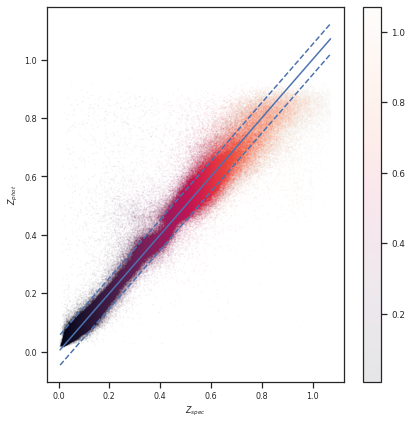

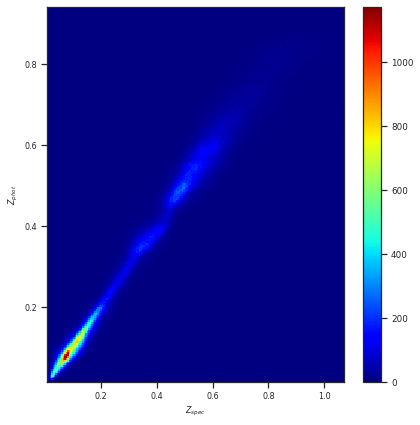

In [43]:
x = dep_vars_test['Z_NOQSO']
y = model_pred[:,1]
#mascara = (x < 1.1) & (y < 1.1)
#x = x[mascara]
#y = y[mascara]

ztest = dep_vars_test['Z_NOQSO']
zpred = model_pred[:,1]
#rms = np.sqrt(np.mean((ztest - zpred) ** 2))
rms = mean_squared_error(ztest, zpred, squared=False) # Usando la raíz cuadrada
print('rms = ', rms)

import matplotlib.colors as mcolors
gamma = 0.5

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.1, marker='.', s=0.2, c=z)
plt.colorbar()
plt.plot([x.min(),x.max()], [x.min(),x.max()], color='b')
plt.plot([x.min(),x.max()], [x.min() + rms,x.max() + rms], ls='--', color='b')
plt.plot([x.min(),x.max()], [x.min() - rms,x.max() - rms], ls='--', color='b')
plt.xlabel(r'$Z_{spec}$',fontsize='small')
plt.ylabel(r'$Z_{phot}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
#plt.savefig('mass_vs_mass.jpg')
plt.show()

plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=(200, 200), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel(r'$Z_{spec}$',fontsize='small')
plt.ylabel(r'$Z_{phot}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
#plt.savefig('mass_vs_mass.jpg')
plt.show()

# Precisión del modelo para distintos rangos de masa, redshift, magnitud y color

[0.3573354  0.35536537 0.40487972 0.54594419 0.63189733]
[0.35006109 0.34934066 0.40097496 0.5446013  0.63011684]
[0.34840165 0.34673323 0.39930815 0.54396945 0.62935976]
[15.69607215 17.18957185 18.68307155 20.17657125 21.67007095]
22.4168208
14.9493223
[0.43268342 0.43687974 0.50006003 0.61306677]
[0.43281903 0.43707289 0.49998726 0.61401079]
[0.43276179 0.43681617 0.49992628 0.61368069]
[0.600762  1.2625522 1.9243424 2.5861326]
2.9170277000000007
0.26986690000000024
[0.34341856 0.43894424 0.56616332 0.58381256]
[0.34355917 0.43917311 0.56568136 0.58425439]
[0.34349985 0.43881555 0.56578443 0.58457238]
[0.14228149 0.38068994 0.61909839 0.85750684]
0.976711063
0.0230772645
[0.16398836 0.18119204 0.17399698 0.16838627 0.14901481]
[0.16434154 0.18119979 0.17405007 0.16842097 0.14898151]
[0.1639697  0.18096144 0.17395437 0.16841603 0.14898429]
[ 8.82826066  9.48278438 10.13730809 10.79183181 11.44635552]
11.773617379401323
8.500998802009889
CPU times: user 9h 52min 48s, sys: 6.76 s, tota

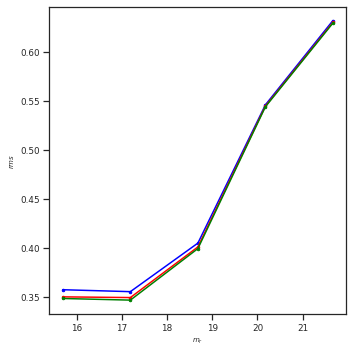

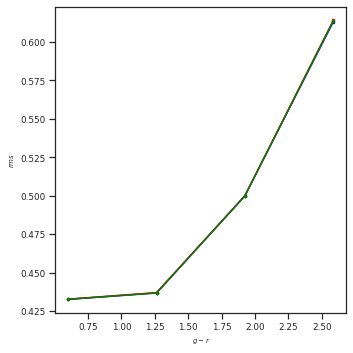

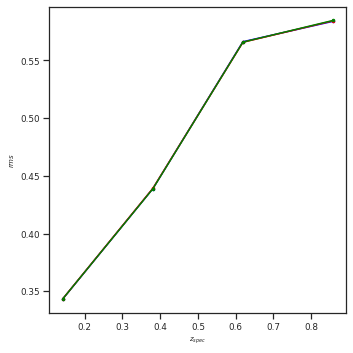

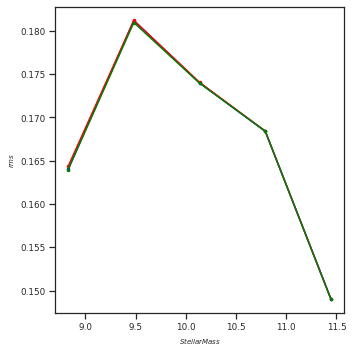

In [61]:
%%time
# Bines en magnitud r para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r1 = np.quantile(np.array(sdss_f['modelmag_r']),q=0.99)
    liminf_r1 = np.quantile(np.array(sdss_f['modelmag_r']),q=0.01)
    bines = np.linspace(liminf_r1,limsup_r1,cantbin + 1)
    marcasclase = (np.linspace(liminf_r1,limsup_r1,cantbin + 1)[1:] + 
                   np.linspace(liminf_r1,limsup_r1,cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['modelmag_r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    #rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var_temp[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r1)
print(liminf_r1)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$m_r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en color g-r para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r2 = np.quantile(np.array(sdss_f['g-r']),q=0.99)
    liminf_r2 = np.quantile(np.array(sdss_f['g-r']),q=0.01)
    bines = np.linspace(liminf_r2,limsup_r2,cantbin + 1)
    marcasclase = (np.linspace(liminf_r2,limsup_r2, cantbin + 1)[1:] + 
               np.linspace(liminf_r2,limsup_r2, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['g-r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r2)
print(liminf_r2)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$g-r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper right',frameon=False)
plt.tight_layout()
# Bines en redshift espectroscópico para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r3 = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.99)
    liminf_r3 = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.01)
    bines = np.linspace(liminf_r3,limsup_r3,cantbin + 1)
    marcasclase = (np.linspace(liminf_r3,limsup_r3, cantbin + 1)[1:] + 
                   np.linspace(liminf_r3,limsup_r3, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Z_NOQSO']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r3)
print(liminf_r3)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$z_{spec}$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en masa para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.99)
    liminf_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.01)
    bines = np.linspace(liminf_r4,limsup_r4,cantbin + 1)
    marcasclase = (np.linspace(liminf_r4,limsup_r4, cantbin + 1)[1:] + 
                   np.linspace(liminf_r4,limsup_r4, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Chabrier_MILES_total_mass']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r4)
print(liminf_r4)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$Stellar Mass$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()

[0.32556092 0.33297346 0.36490546 0.51496882 0.64302667]
[0.31623098 0.32572886 0.36023797 0.50835522 0.66752694]
[15.69607215 17.18957185 18.68307155 20.17657125 21.67007095]
22.4168208
14.9493223
[0.36759577 0.27227826 0.27707007 0.67127263]
[0.36760361 0.27223424 0.27713068 0.68344488]
[0.600762  1.2625522 1.9243424 2.5861326]
2.9170277000000007
0.26986690000000024
[0.3168251  0.30474253 0.40747025 0.85135958]
[0.31688345 0.30433552 0.40661936 0.83607071]
[0.14228149 0.38068994 0.61909839 0.85750684]
0.976711063
0.0230772645
[0.17271865 0.17109298 0.1628748  0.15278624 0.13060828]
[0.17294582 0.171109   0.16297953 0.15271633 0.13053141]
[ 8.82826066  9.48278438 10.13730809 10.79183181 11.44635552]
11.773617379401323
8.500998802009889
CPU times: user 3h 2min 34s, sys: 1.88 s, total: 3h 2min 36s
Wall time: 3h 2min 35s


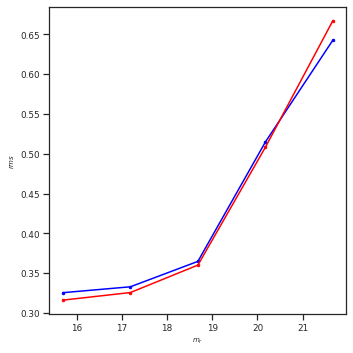

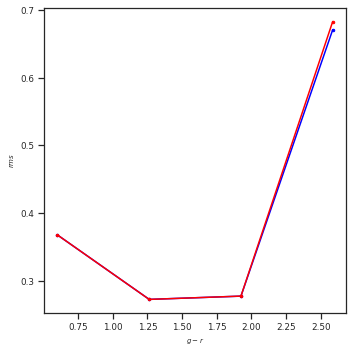

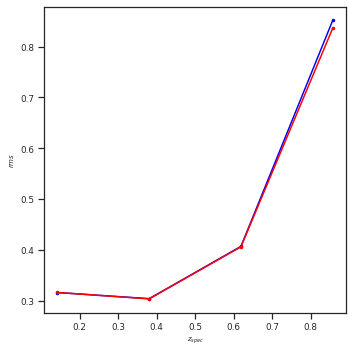

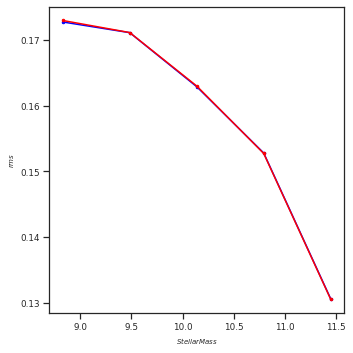

In [91]:
%%time
# Bines en magnitud r para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 22.4168208
    liminf_r = 14.9493223
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r,cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r,cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['modelmag_r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    #rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var_temp[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$m_r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en color g-r para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 2.9170277000000007
    liminf_r = 0.26986690000000024
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
               np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['g-r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$g-r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper right',frameon=False)
plt.tight_layout()
# Bines en redshift espectroscópico para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 0.976711063
    liminf_r = 0.0230772645
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Z_NOQSO']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$z_{spec}$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en masa para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 11.773617379401323
    liminf_r = 8.500998802009889
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Chabrier_MILES_total_mass']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$Stellar Mass$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()

# Encontrando las PDFs

In [112]:
# Función pora graficar las PDF
def plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro):
    g = sns.jointplot(z_dist,mass_dist, kind="kde", fill=True)
    print('z_pred', modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1])
    print('z_true', dep_vars_test['Z_NOQSO'].iloc[obj_nro-1])
    print('mass_pred', modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0])
    print('mass_true', dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1])
    g.ax_joint.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                          linestyle='--',color='red')
    g.ax_joint.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                          linestyle='--',color='red')
    g.ax_marg_x.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                           linestyle='--', color='red')
    g.ax_marg_y.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                           linestyle='--', color='red')
    g.ax_joint.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_joint.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_marg_x.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1], 
                           linestyle='--',color='black')
    g.ax_marg_y.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                           linestyle='--', color='black')
    g.ax_joint.set_xlabel(r'$Z_{photo}$')
    g.ax_joint.set_ylabel(r'$log_{10}(M_{\ast} / M_{\odot})_{pred}$')
    plt.tight_layout()
    plt.savefig('pdf1.jpg')
    if False:
        g.ax_joint.axvline(x=z_dist.mean(),
                              linestyle='--',color='green')
        g.ax_joint.axhline(y=mass_dist.mean(),
                              linestyle='--',color='green')
        g.ax_marg_x.axvline(x=z_dist.mean(),
                               linestyle='--', color='green')
        g.ax_marg_y.axhline(y=mass_dist.mean(),
                               linestyle='--', color='green')
    #plt.plot(0,20,color='red', marker='*',
    #                          markersize=10, linestyle='None')

In [96]:
%%time
# Información necesaria para utilizar la función que devuelve las PDF
# Se obtienen los árboles del modelo
train_trees = modelo.apply(ind_vars_train)
train_trees = np.array(train_trees)
nro_samples_train = len(ind_vars_train) # Cantidad de galaxias en el entrenamiento
Z_NOQSO = np.array(dep_vars_train['Z_NOQSO'])
Chabrier_MILES_total_mass = np.array(dep_vars_train['Chabrier_MILES_total_mass'])
ind_leaves = np.unique(train_trees) # Identificadores de cada hoja de los árboles
n_trees = modelo.n_estimators # Cantidad de estimadores

CPU times: user 1min 17s, sys: 154 ms, total: 1min 17s
Wall time: 1min 17s


In [103]:
# Función para determinar la pdf
@njit(parallel=True)
def one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    cont = 0
    for tree in prange(n_trees):
        cont = cont + np.sum(id_leaf_obj[0,tree] == train_trees[:,tree])
    z_dist = np.zeros(cont)
    mass_dist = np.zeros(cont)
    j = 0
    for tree in range(n_trees):
        for sample in range(nro_samples_train):
            if train_trees[sample,tree] == id_leaf_obj[0,tree]:
                z_dist[j] = z_NOQSO[sample]
                mass_dist[j] = Chabrier_MILES_total_mass[sample]
                j += 1
    return z_dist, mass_dist

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


z_pred 0.6747868840000001
z_true 0.6269024
mass_pred 10.538312301094354
mass_true 11.423626575093724
CPU times: user 1.87 s, sys: 289 ms, total: 2.16 s
Wall time: 1.05 s


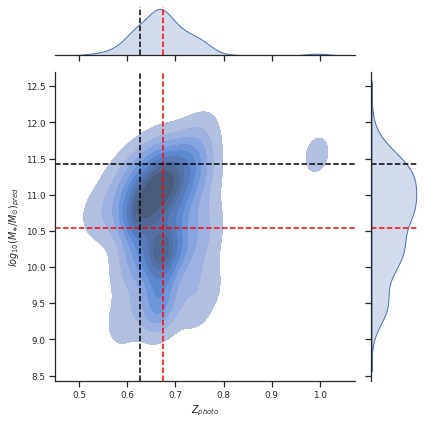

In [113]:
%%time
obj_nro = 5
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

# Errores de las estimaciones

In [42]:
# Cálculo de las dispersiones de las pdf
z_sigma = np.zeros(len(ind_vars_test))
mass_sigma = np.zeros(len(ind_vars_test))

In [43]:
global z_sigma, mass_sigma

In [41]:
%%time
for i in range(len(ind_vars_test)):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [42]:
np.sum(z_sigma < 0.03) / len(z_sigma)

0.45315892390728385

In [55]:
np.sum(mass_sigma < 0.5) / len(mass_sigma)

0.5983221806961684

In [36]:
%%timeit
for i in range(30):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6.36 s ± 64.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
objs = model_fit.apply(ind_vars_test)

In [30]:
global objs

In [65]:
@njit(parallel=True)
def fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    for i in range(30):
        #if i%1000 == 0:
        #    print(i)
        id_leaf_obj = objs[i,:]
        id_leaf_obj = id_leaf_obj.T
        cont = 0
        for tree in range(n_trees):
            cont = cont + np.sum(id_leaf_obj[tree] == train_trees[:,tree])
        z_dist = np.zeros(cont)
        mass_dist = np.zeros(cont)
        j = 0
        for tree in range(n_trees):
            for sample in range(nro_samples_train):
                if (train_trees[sample,tree] == id_leaf_obj[tree]):
                    z_dist[j] = Z_NOQSO[sample]
                    mass_dist[j] = Chabrier_MILES_total_mass[sample]
                    j += 1
        z_sigma[i] = np.std(z_dist)
        mass_sigma[i] = np.std(mass_dist)
        #return z_dist.std(), mass_dist.std()
    return z_sigma, mass_sigma

In [66]:
%%time
fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(readonly array(float64, 1d, C), int64, float64)
 
There are 16 candidate implementations:
[1m      - Of which 14 did not match due to:
      Overload of function 'setitem': File: <numerous>: Line N/A.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       No match.[0m
[1m      - Of which 2 did not match due to:
      Overload in function 'SetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 176.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       Rejected as the implementation raised a specific error:
         NumbaTypeError: [1mCannot modify readonly array of type: readonly array(float64, 1d, C)[0m[0m
  raised from /home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/numba/core/typing/arraydecl.py:183
[0m
[0m[1mDuring: typing of setitem at /tmp/ipykernel_8385/3341675461.py (21)[0m
[1m
File "../../../../../tmp/ipykernel_8385/3341675461.py", line 21:[0m
[1m<source missing, REPL/exec in use?>[0m


In [41]:
%%timeit
from joblib import Parallel, delayed
Parallel(n_jobs=25)(delayed(fun)(i) for i in range(30))

1min 20s ± 756 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0
0
0
0
0
0
0
0


In [39]:
((((500000*6.36)/30)/60)/60)

29.444444444444446